<a href="https://colab.research.google.com/github/alexandre-pinon/deep-learning-learning/blob/master/ztm/00_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we're going to cover some of the most fundamental concepts of tensors using TensorFlow

More specifically, we're going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & NumPy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with TensorFlow (or TPUs)
* Exercises to try

## Introduction to tensors

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
# Create tensors with ts.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [4]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [5]:
# Create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [6]:
# Check the dimension of our vector
vector.ndim

1

In [7]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [8]:
matrix.ndim

2

In [9]:
# Create another matrix and define the datatype
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9.]], dtype=tf.float16) # specify the datatype with 'dtype'
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [10]:
another_matrix.ndim

2

In [11]:
# How about a tensor? (more than 2 dimensions, although, all of the above items are also technically tensors)
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [12]:
tensor.ndim

3

What we've created so far:
- scalar: a single number.
- vector: a number with direction (e.g. wind speed with direction).
- matrix: a 2-dimensional array of numbers.
- tensor: an n-dimensional arrary of numbers (where n can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector).

### Creating Tensors with `tf.Variable()`

In [13]:
# Create the same tensor with tf.Variable() and tf.constant()
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [15]:
# Will error (requires the .assign() method)
changeable_tensor[0] = 7
changeable_tensor

TypeError: ignored

In [16]:
# Won't error
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [17]:
# Will error (can't change tf.constant())
unchangeable_tensor[0].assign(7)
unchangleable_tensor

AttributeError: ignored

Which one should you use? tf.constant() or `tf.Variable()?`

It will depend on what your problem requires. However, most of the time, TensorFlow will automatically choose for you (when loading data or modelling data).

###Creating random tensors


In [20]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) # set the seed for reproducibility
random_1 = random_1.normal(shape=(3, 2)) # create tensor from a normal distribution 
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))

# Are they equal?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

In [21]:
# Shuffle a tensor (valuable for when you want to shuffle your data)
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
# Gets different results each time
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [22]:
# Shuffle in the same order every time

# Set the global random seed
tf.random.set_seed(42)

# Set the operation random seed
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [23]:
import numpy as np

In [24]:
arr = np.arange(0, 32, dtype=np.int32)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int32)

In [25]:
tf.constant(arr, shape=(8, 2, 2))

<tf.Tensor: shape=(8, 2, 2), dtype=int32, numpy=
array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19]],

       [[20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27]],

       [[28, 29],
        [30, 31]]], dtype=int32)>

In [26]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros([2, 3, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [27]:
rank_4_tensor[:1, :1, :1]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [28]:
rank_2_tensor = tf.constant([[1, 2], 
                             [3, 4]])
other_rank_2_tensor = tf.constant([[2],   
                                  [3]])

In [29]:
tf.matmul(rank_2_tensor, other_rank_2_tensor)

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[ 8],
       [18]], dtype=int32)>

In [30]:
rank_3_tensor = tf.constant([[[1, 2], 
                             [3, 4],
                              [5, 6]],
                             [[1, 2], 
                             [3, 4],
                              [5, 6]],
                             [[1, 2], 
                             [3, 4],
                              [5, 6]]
                             ])
rank_3_tensor

<tf.Tensor: shape=(3, 3, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4],
        [5, 6]],

       [[1, 2],
        [3, 4],
        [5, 6]],

       [[1, 2],
        [3, 4],
        [5, 6]]], dtype=int32)>

In [31]:
other_rank_3_tensor = tf.constant([[[1, 2, 3], 
                             [3, 4, 5],
                              [5, 6, 7]],
                             [[1, 2, 3], 
                             [3, 4, 5],
                              [5, 6, 7]],
                             ])
other_rank_3_tensor

<tf.Tensor: shape=(2, 3, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [3, 4, 5],
        [5, 6, 7]],

       [[1, 2, 3],
        [3, 4, 5],
        [5, 6, 7]]], dtype=int32)>

In [32]:
tf.tensordot(rank_3_tensor, other_rank_3_tensor, axes=2)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 71,  92, 113],
       [ 71,  92, 113],
       [ 71,  92, 113]], dtype=int32)>

In [33]:
A = tf.random.uniform(shape=(50,), minval=0, maxval=100, dtype=np.int32)
A

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([87, 89, 61, 86, 92, 84, 83, 43, 71, 91, 52, 40, 51, 81, 20,  8, 59,
       32,  9, 99, 11, 12, 97, 94, 19,  1, 61, 45,  6, 15, 70, 52,  1, 23,
       68, 65,  3, 50,  3, 88, 52, 38,  1, 19, 92, 54, 82, 79, 39, 36],
      dtype=int32)>

In [34]:
print(f'Min: {tf.reduce_min(A).numpy()}')
print(f'Argmin: {tf.argmin(A).numpy()}')
print(f'Max: {tf.reduce_max(A).numpy()}')
print(f'Argmax: {tf.argmax(A).numpy()}')
print(f'Mean: {tf.reduce_mean(A).numpy()}')
print(f'Sum: {tf.reduce_sum(A).numpy()}')
print(f'Variance: {tf.math.reduce_variance(tf.cast(A, tf.float32)).numpy()}')
print(f'STD: {tf.math.reduce_std(tf.cast(A, tf.float32)).numpy()}')

Min: 1
Argmin: 25
Max: 99
Argmax: 19
Mean: 50
Sum: 2514
Variance: 997.9215698242188
STD: 31.58989715576172


In [35]:
tf.squeeze(tf.random.uniform(shape=(50,2), minval=0, maxval=100, dtype=np.int32))

<tf.Tensor: shape=(50, 2), dtype=int32, numpy=
array([[98, 43],
       [19, 94],
       [32, 13],
       [84, 42],
       [86, 24],
       [81, 63],
       [46,  0],
       [69, 69],
       [ 0, 81],
       [24, 97],
       [80, 18],
       [41, 96],
       [ 2, 54],
       [69, 59],
       [24, 48],
       [82, 41],
       [57, 33],
       [47, 75],
       [47, 36],
       [31, 64],
       [63, 35],
       [35, 29],
       [44, 38],
       [33, 91],
       [62, 23],
       [97, 62],
       [70, 79],
       [74, 40],
       [ 4, 16],
       [28, 86],
       [68, 70],
       [74, 91],
       [29, 31],
       [43,  9],
       [44, 80],
       [97, 42],
       [64, 23],
       [80, 16],
       [61, 90],
       [61, 45],
       [27, 70],
       [ 4, 66],
       [93, 82],
       [21, 69],
       [60, 78],
       [14, 19],
       [82, 88],
       [ 5,  4],
       [17, 41],
       [ 9, 51]], dtype=int32)>

In [36]:
a = tf.constant([0, 1, 2, 3, 4])
tf.one_hot(a, a.shape[0])

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [37]:
import matplotlib.pyplot as plt

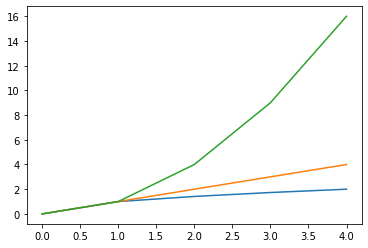

In [45]:
Y = tf.sqrt(tf.range(5, dtype=tf.float32))
x = np.arange(5)
plt.plot(x, Y)
plt.plot(x, tf.range(5))
plt.plot(x, tf.square(tf.range(5)))

In [1]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
!nvidia-smi

Sun Mar 20 13:57:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    34W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------